# Cinema Sales Forecasting 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

# preprocessing
from sklearn.preprocessing import StandardScaler 

# k-means clustering 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# linear, lasso, ridge regression & decision regressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Business Understanding 

Cinema industry is not excluded of getting advantage of predictive modeling. Like other industry e.g. retail , banking and restaurants , `sale forecast` can help cinemas for `cost reduction` and `better ROI`. By forecasting sale, screening in different location could be optimized as well as effective market targeting and pricing.

Also historical data of sale and movies details e.g. cost, cast and crews, and other project details like schedule, could help producers to select high performance cast and crews and planning for better projects ROI . Also it helps to assign screening location on hot spots and areas.

Dataset is obtained from kaggle. Download the dataset via the [link](https://www.kaggle.com/datasets/arashnic/cinema-ticket)

# Data Understanding 

1. `film_code`: Unique movie id
2. `cinema_code`: Unique cinema id
3. `total_sales`: total sales per screening time
4. `tickets`: number of ticket solds
5. `tickets_out`: number of ticket cancelled
6. `show_time`: screening time in each day
7. `occu_per`: occupation percent(%) of cinema by means of available capacity
8. `ticket_price`: price of ticket at show time
9. `ticket_use`: total number of ticket used
10. `capacity` capacity of the cinema 

In [7]:
# load dataset 
df = pd.read_csv('CinemaTicket.csv')

In [8]:
# dimension 
print(f'Number of rows: {df.shape[0]}')
print(f'Number of cols: {df.shape[1]}')
print('-' * 50) 

# null 
print('Null:') 
print(df.isnull().sum()) 
print('-' * 50) 

# duplicate
print(f'Duplicate: {df.duplicated().sum()}')
print('-' * 50) 

# unique value 
print('Unique:') 
print(df.nunique()) 

Number of rows: 142524
Number of cols: 14
--------------------------------------------------
Null:
film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64
--------------------------------------------------
Duplicate: 106
--------------------------------------------------
Unique:
film_code          48
cinema_code       246
total_sales      9464
tickets_sold     2231
tickets_out        96
show_time          51
occu_perc        9311
ticket_price    23235
ticket_use       2283
capacity        57361
date              234
month              10
quarter             4
day                31
dtype: int64


In [9]:
# drop duplicate & null 
df.drop_duplicates(inplace=True) 
df.dropna(inplace=True)

In [10]:
# null 
print('Null:') 
print(df.isnull().sum()) 
print('-' * 50) 

# duplicate
print(f'Duplicate: {df.duplicated().sum()}')
print('-' * 50) 

Null:
film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64
--------------------------------------------------
Duplicate: 0
--------------------------------------------------


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142295 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142295 non-null  int64  
 1   cinema_code   142295 non-null  int64  
 2   total_sales   142295 non-null  int64  
 3   tickets_sold  142295 non-null  int64  
 4   tickets_out   142295 non-null  int64  
 5   show_time     142295 non-null  int64  
 6   occu_perc     142295 non-null  float64
 7   ticket_price  142295 non-null  float64
 8   ticket_use    142295 non-null  int64  
 9   capacity      142295 non-null  float64
 10  date          142295 non-null  object 
 11  month         142295 non-null  int64  
 12  quarter       142295 non-null  int64  
 13  day           142295 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 16.3+ MB


# EDA 

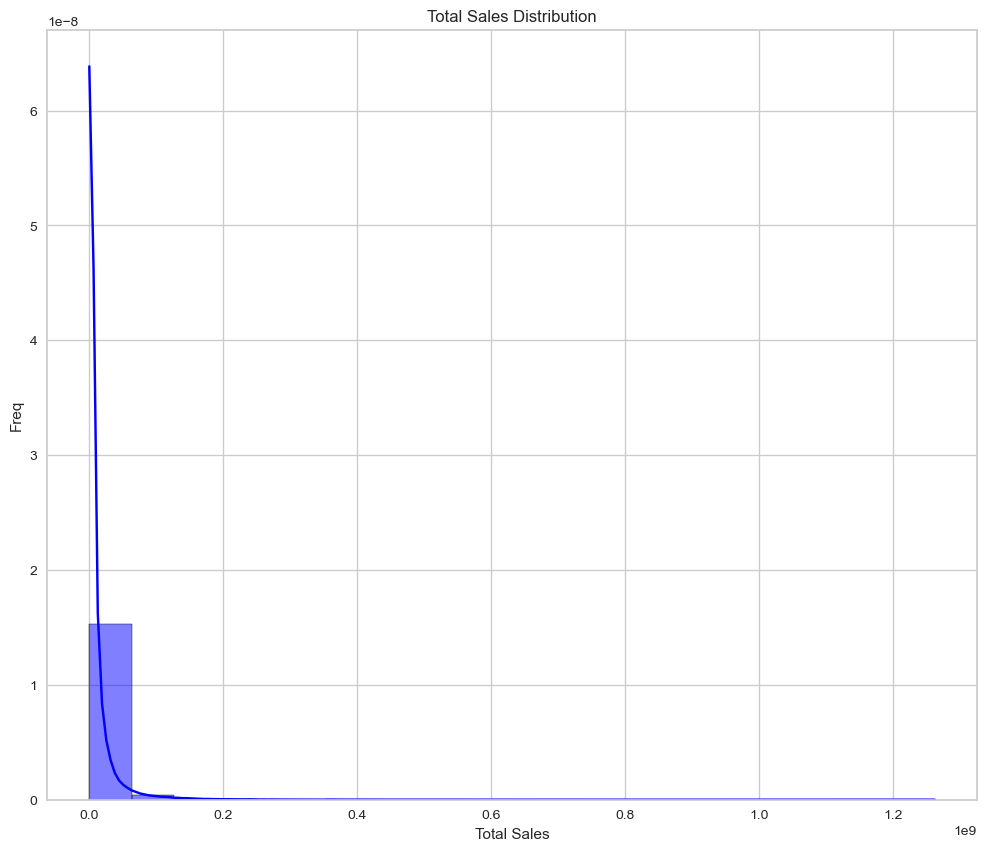

In [13]:
# total_sales distribution 
plt.figure(figsize=(12,10))
plt.title('Total Sales Distribution')
sns.histplot(df['total_sales'], bins=20, kde=True, stat='density', color='blue', alpha=0.5)
plt.xlabel('Total Sales')
plt.ylabel('Freq') 
plt.show() 

In [14]:
# top 5 cinema 
eda = df.groupby('cinema_code').agg(
    total_sales = ('total_sales', 'sum') , 
    total_tickets_sold = ('tickets_sold', 'sum')
).sort_values(by='total_sales', ascending=False) 

print('Top 5 cinema')
eda.head()

Top 5 cinema


,total_sales,total_tickets_sold
cinema_code,,
448,213905979826,1683313
304,101602933000,786023
163,62755809999,612029
524,59235204992,493444
489,58760547000,520199


In [15]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

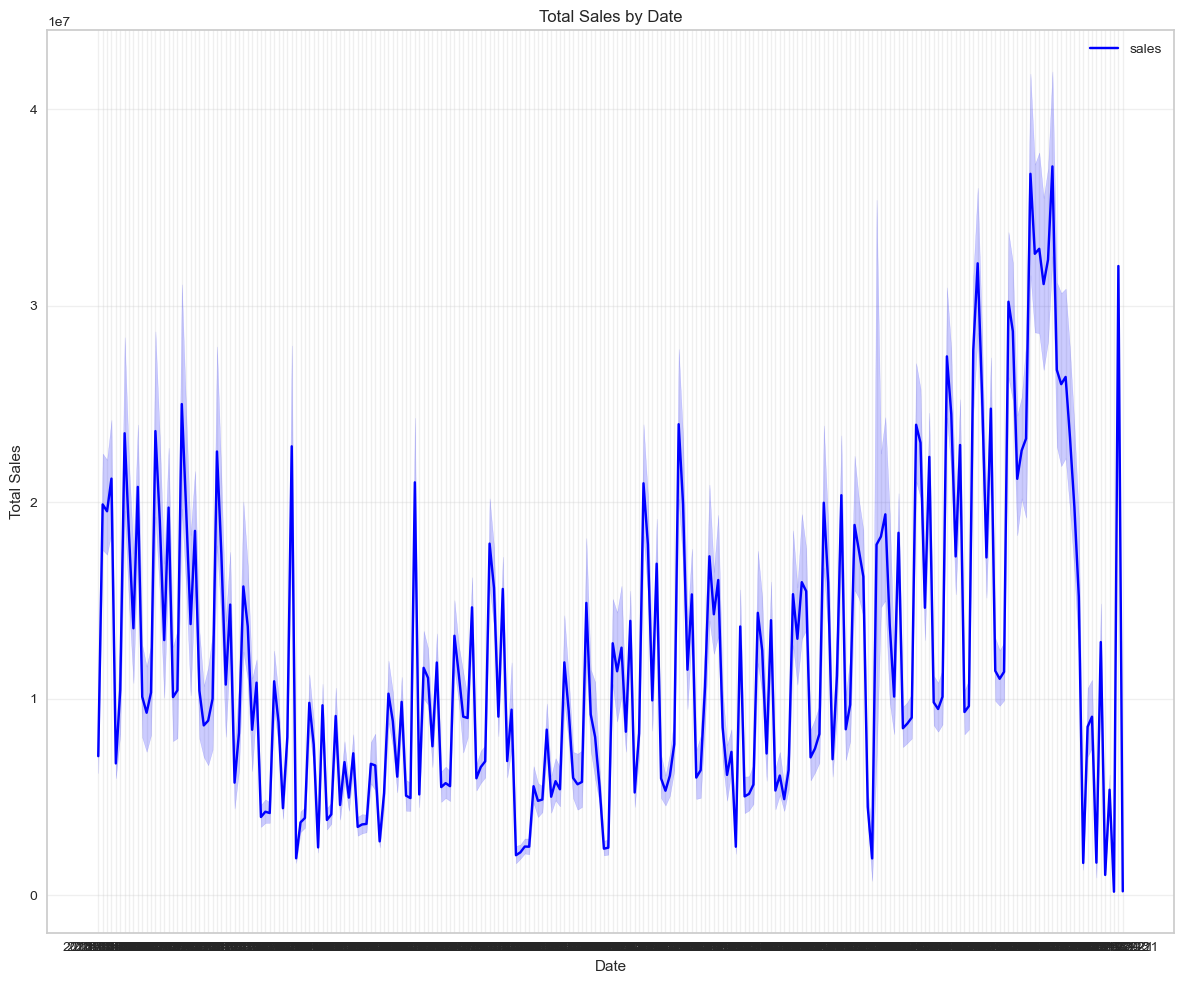

In [16]:
# total sales by date
plt.figure(figsize=(12,10)) 
plt.title('Total Sales by Date')
sns.lineplot(data=df, x='date', y='total_sales', markers='o', color='blue', label='sales') 
plt.xlabel('Date') 
plt.ylabel('Total Sales')
plt.grid(alpha=0.3) 
plt.tight_layout() 
plt.show() 

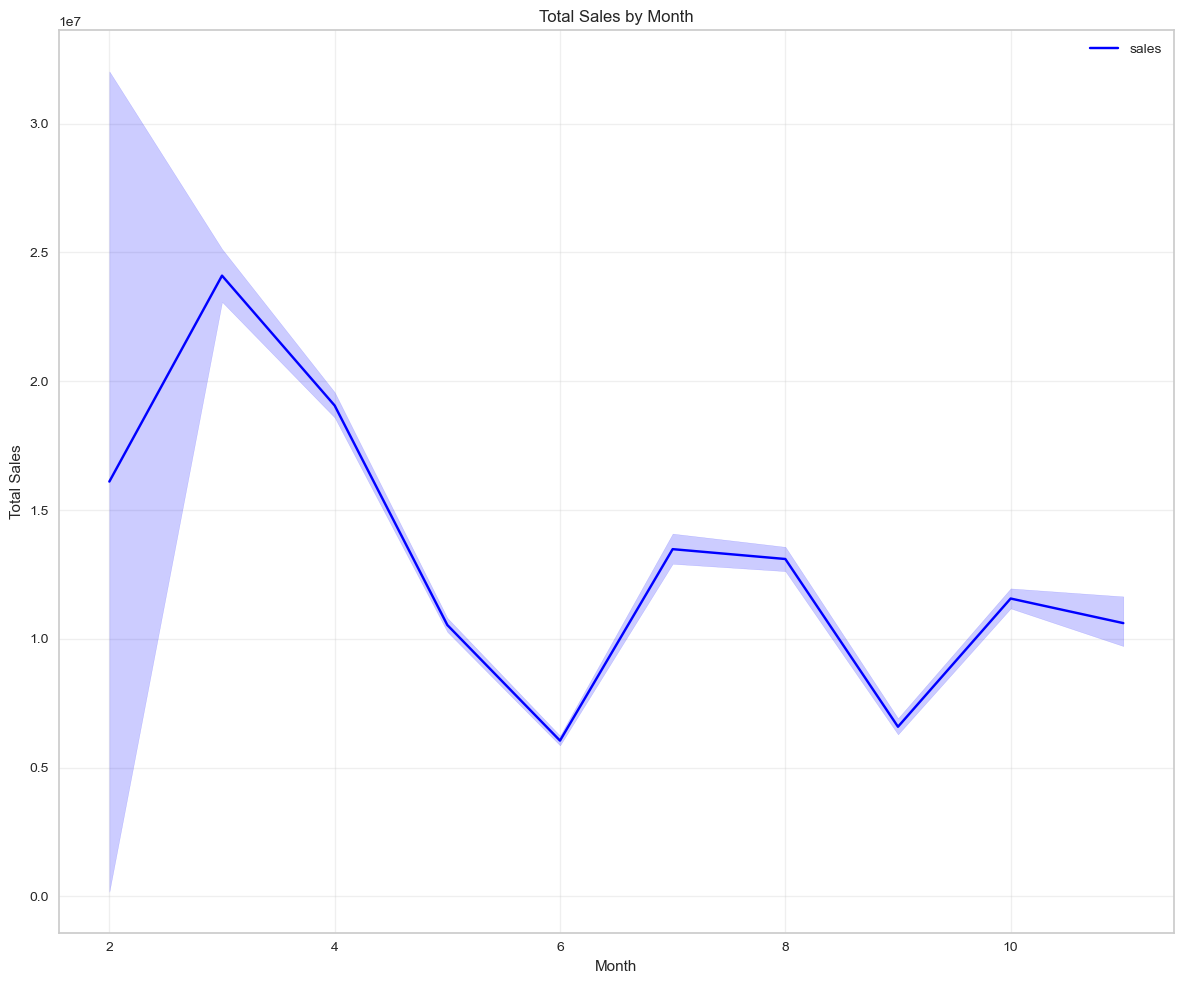

In [17]:
# total sales by month
plt.figure(figsize=(12,10)) 
plt.title('Total Sales by Month')
sns.lineplot(data=df, x='month', y='total_sales', markers='o', color='blue', label='sales') 
plt.xlabel('Month') 
plt.ylabel('Total Sales')
plt.grid(alpha=0.3) 
plt.tight_layout() 
plt.show() 

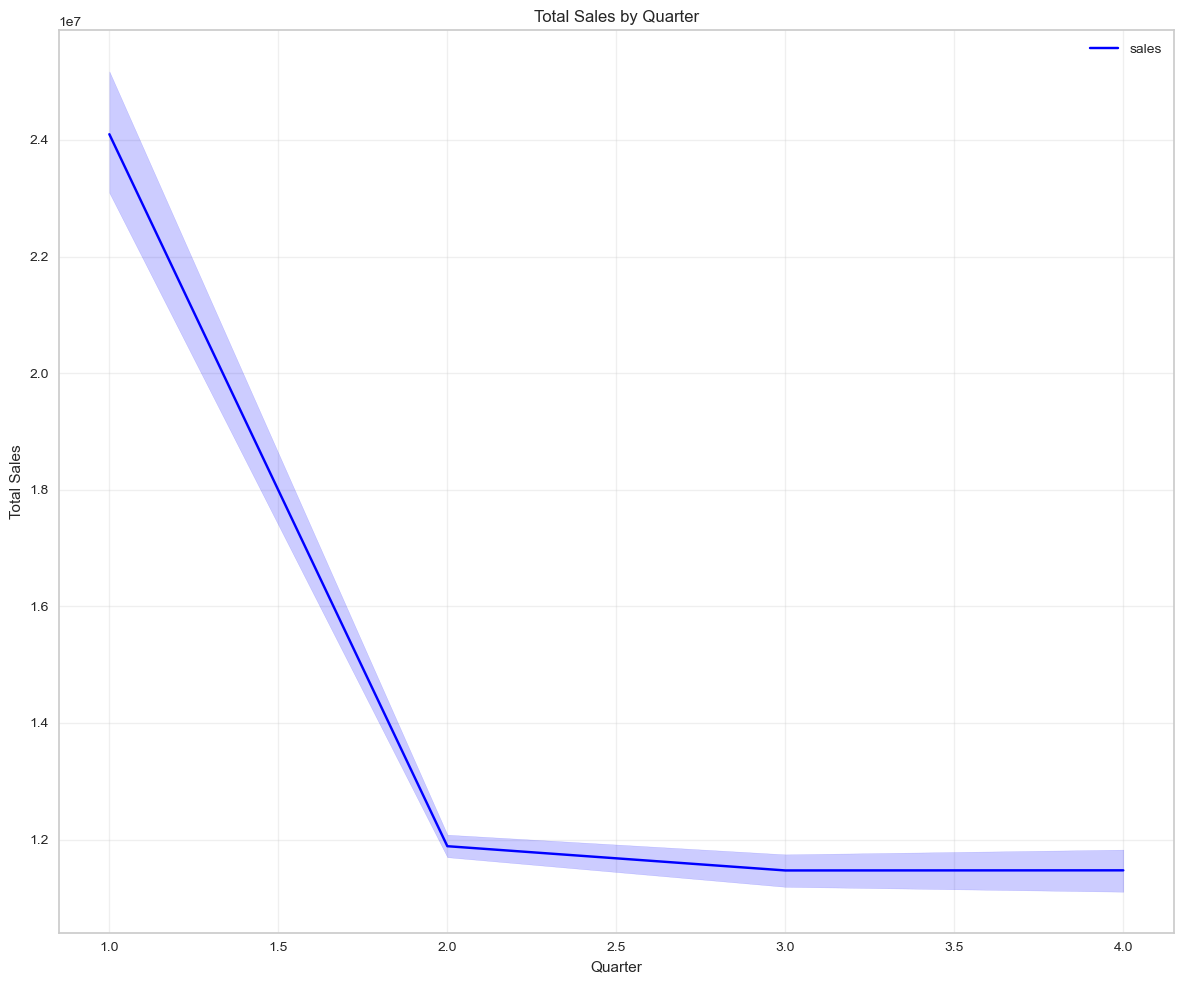

In [18]:
# total sales by quarter 
plt.figure(figsize=(12,10)) 
plt.title('Total Sales by Quarter')
sns.lineplot(data=df, x='quarter', y='total_sales', markers='o', color='blue', label='sales') 
plt.xlabel('Quarter') 
plt.ylabel('Total Sales')
plt.grid(alpha=0.3) 
plt.tight_layout() 
plt.show() 

## EDA: Cinema 448

In [20]:
df_448 = df[df['cinema_code']==448]

In [21]:
df_448.shape

(2344, 14)

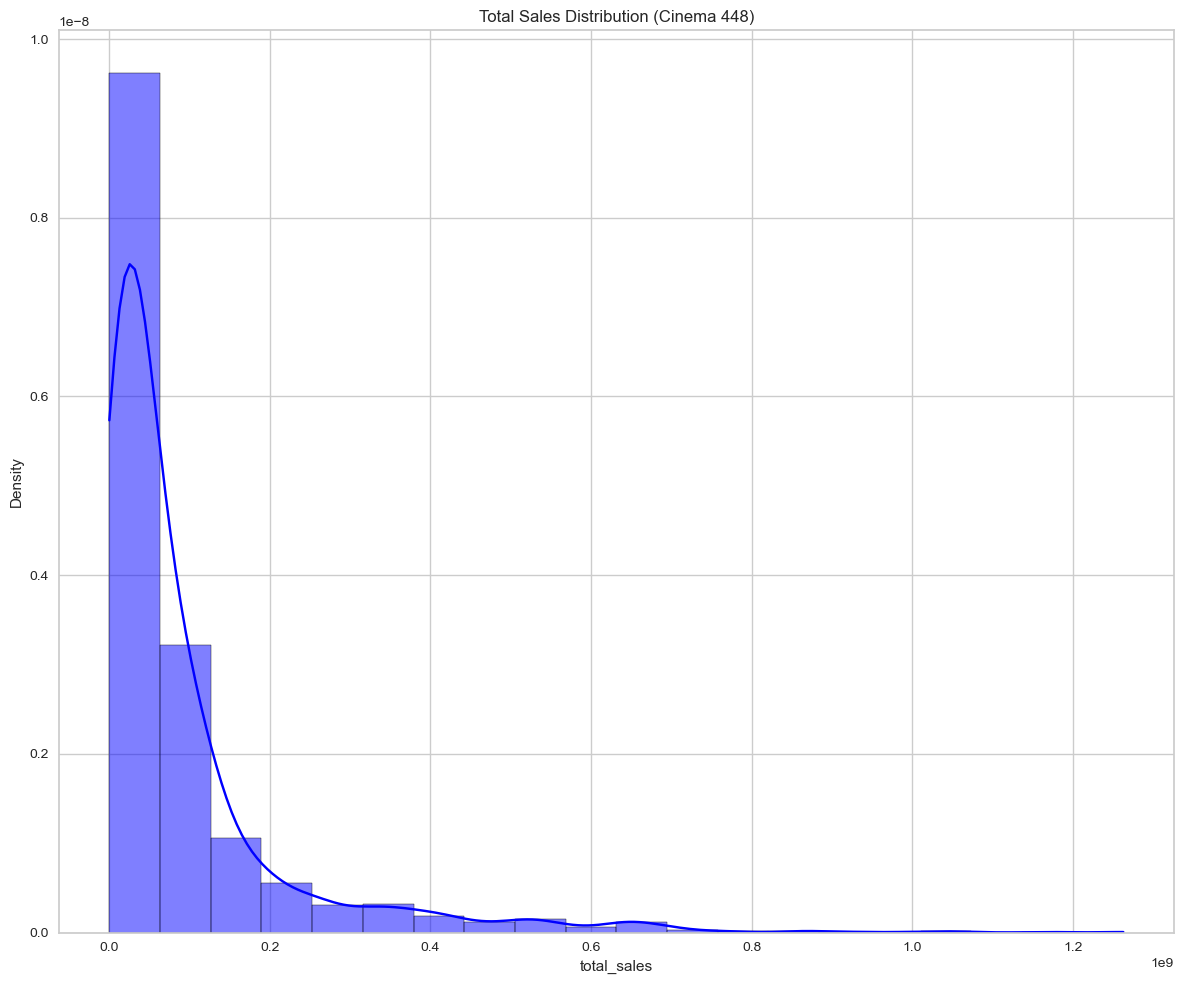

In [22]:
# total sales distribution 
plt.figure(figsize=(12,10)) 
plt.title('Total Sales Distribution (Cinema 448)')
sns.histplot(data=df_448, x='total_sales', bins=20, kde=True, color='Blue', stat='density', alpha=0.5)
plt.tight_layout() 
plt.show() 

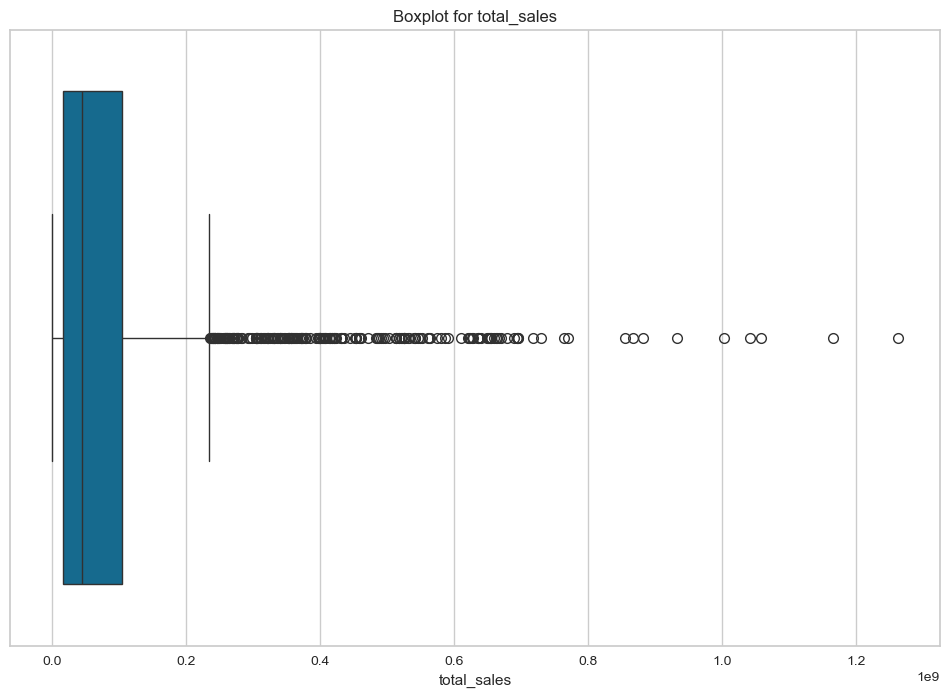

In [23]:
# total sales boxplot 
plt.figure(figsize=(12,8))
plt.title('Boxplot for total_sales') 
sns.boxplot(data=df_448, x='total_sales') 
plt.show()

In [24]:
# remove outlier 
Q1 = df_448['total_sales'].quantile(0.25) 
Q3 = df_448['total_sales'].quantile(0.75) 
IQR = Q3 - Q1 

# calculate bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df_448[(df_448['total_sales'] >= lower_bound) & (df_448['total_sales'] <= upper_bound)]

In [25]:
df_no_outliers.shape

(2115, 14)

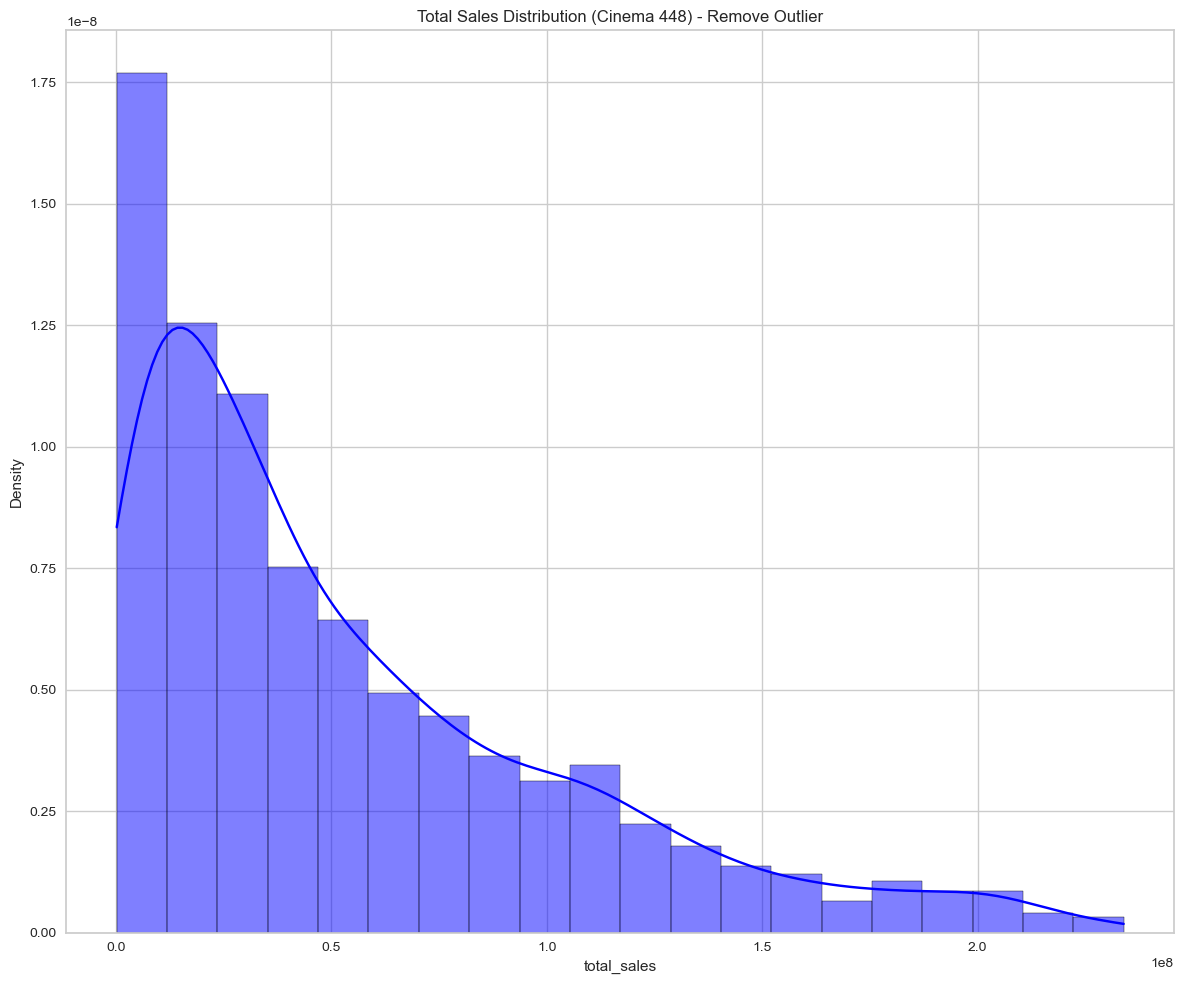

In [26]:
# total sales distribution after remove outlier
plt.figure(figsize=(12,10)) 
plt.title('Total Sales Distribution (Cinema 448) - Remove Outlier')
sns.histplot(data=df_no_outliers, x='total_sales', bins=20, kde=True, color='Blue', stat='density', alpha=0.5)
plt.tight_layout() 
plt.show() 

In [27]:
# Apply log transformation for total_sales
df_no_outliers['log_sales'] = np.log1p(df_no_outliers['total_sales'])
df_no_outliers.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,log_sales
25,1492,448,1350000,9,0,2,2.37,150000.0,9,379.746835,2018-05-04,5,2,4,14.115616
39,1492,448,2700000,18,0,2,9.68,150000.0,18,185.950413,2018-05-03,5,2,3,14.808763
51,1492,448,4350000,29,0,2,7.92,150000.0,29,366.161616,2018-05-02,5,2,2,15.285687
74,1492,448,1200000,8,0,1,4.21,150000.0,8,190.023753,2018-05-06,5,2,6,13.997833
362,1492,448,6400000,80,0,1,42.11,80000.0,80,189.978627,2018-06-12,6,2,12,15.671809


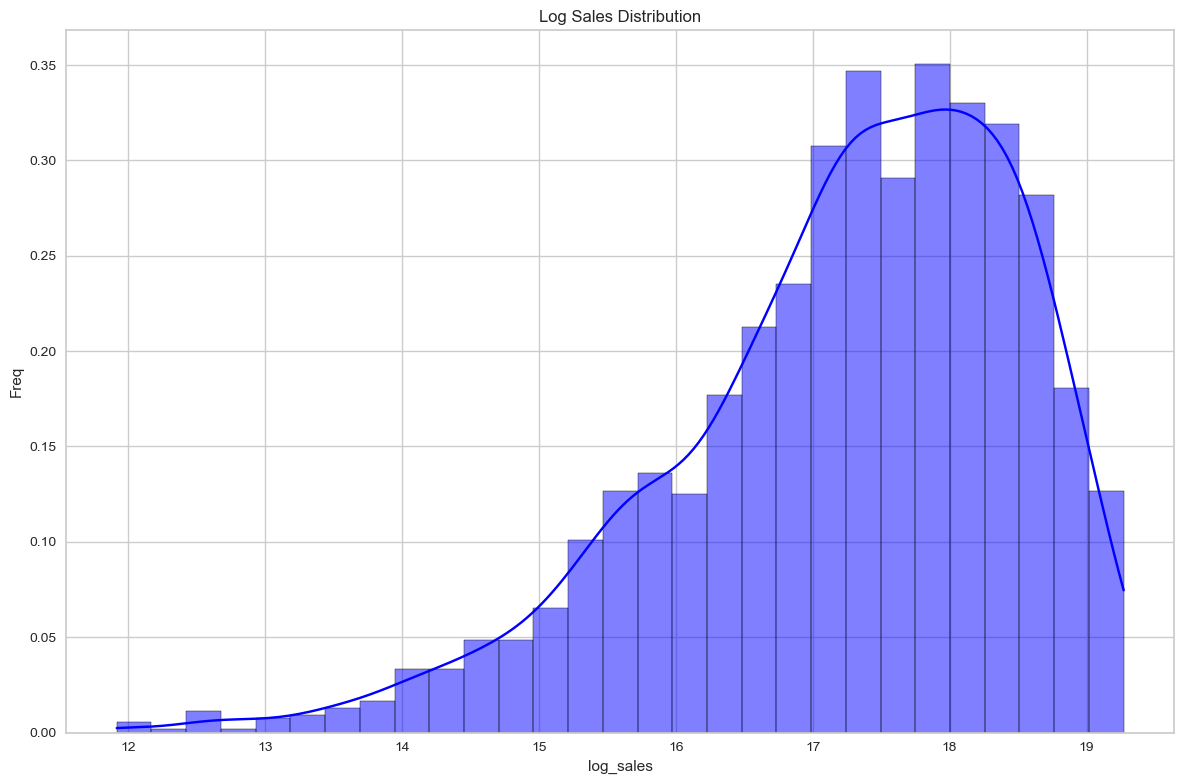

In [28]:
# log_sales distribution 
plt.figure(figsize=(12,8)) 
plt.title('Log Sales Distribution') 
sns.histplot(data=df_no_outliers, x='log_sales', kde=True, stat='density', color='Blue') 
plt.ylabel('Freq')
plt.tight_layout() 
plt.show()

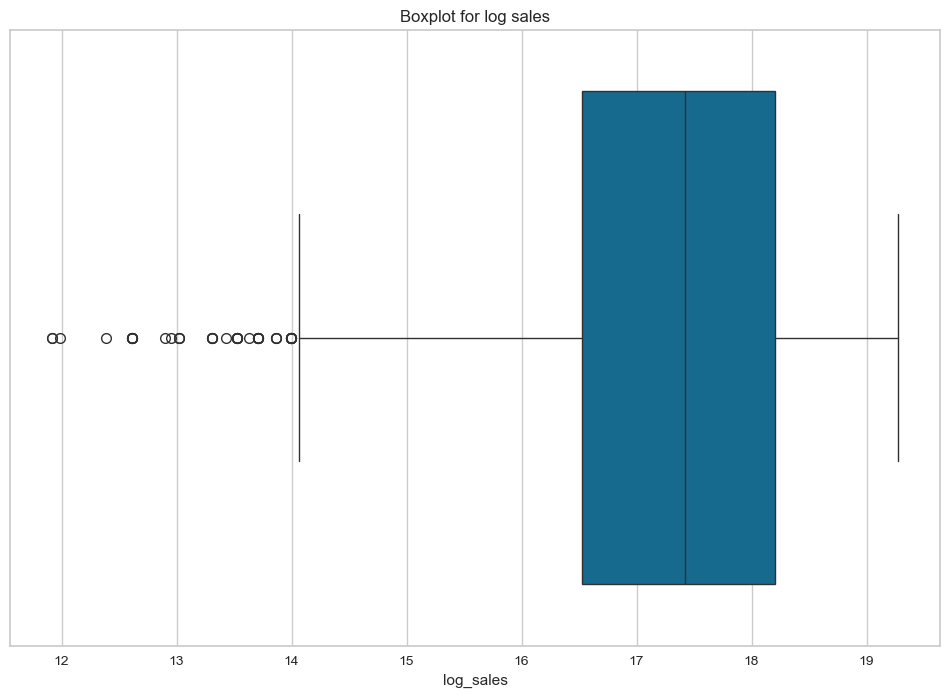

In [29]:
# boxplot for log_sales
plt.figure(figsize=(12,8))
plt.title('Boxplot for log sales') 
sns.boxplot(data=df_no_outliers, x='log_sales') 
plt.show()

# K-means Clustering

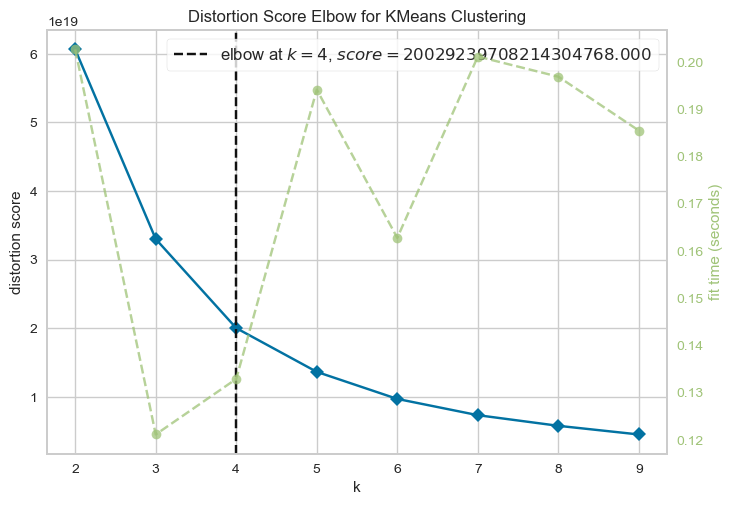

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Instantiate the clustering model and visualizer
km_model = KMeans()
visualizer = KElbowVisualizer(km_model, k=(2,10))

# by total sales 
data = df[['cinema_code', 'total_sales']]

# Fit the data to the visualizer
visualizer.fit(data)        
visualizer.show()  

In [32]:
# Set the number of cluster based on Elbow method 
optimal_n = 4 
km_model = KMeans(n_clusters=optimal_n, random_state=42) 

# fit the model 
km_model.fit(data)

# Create new column 'cluster' 
df['cluster'] = km_model.labels_

In [33]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,cluster
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,1
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,1
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,1
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,1
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,1


In [34]:
# kmeans result 
df_kmean = df.groupby('cluster').agg(
    total_sales = ('total_sales', 'sum'),
    total_tickets_sold = ('tickets_sold', 'sum')
).reset_index()

df_kmean

,cluster,total_sales,total_tickets_sold
0,0,616937293183,6807180
1,1,657366883403,9047238
2,2,114420851204,829980
3,3,366956952399,3250839


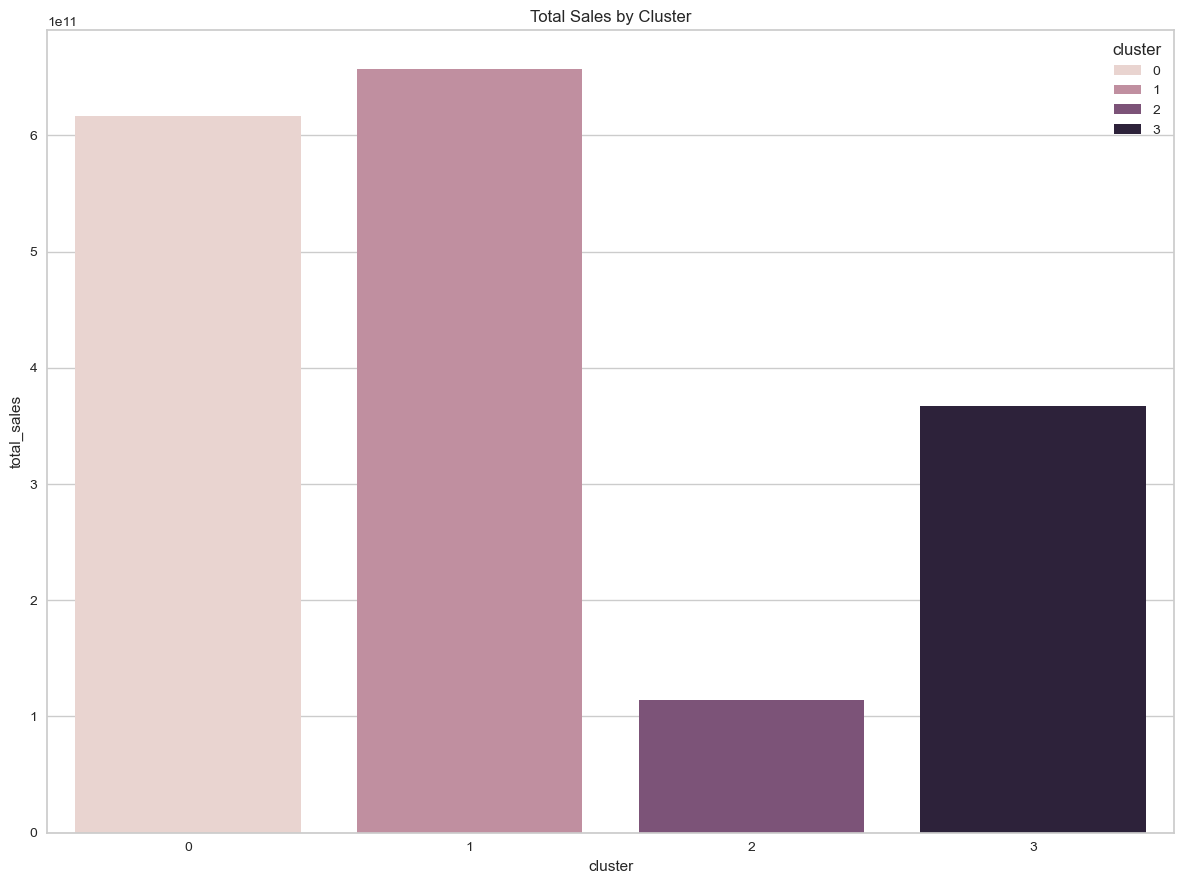

In [35]:
# total sales 
plt.figure(figsize=(12,9)) 
plt.title('Total Sales by Cluster')
barplot = sns.barplot(data=df_kmean, x='cluster', y='total_sales', hue='cluster') 
plt.tight_layout() 
plt.show() 

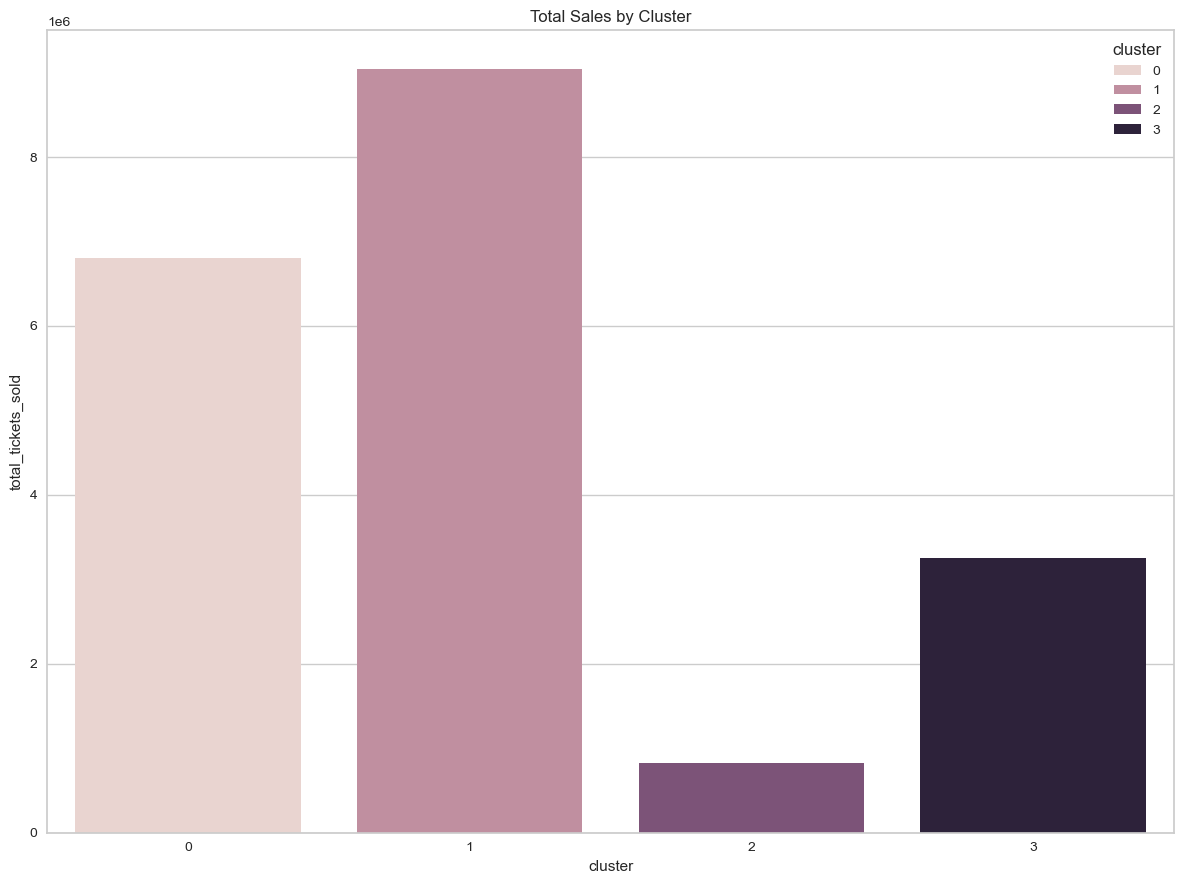

In [36]:
# total ticket solds
plt.figure(figsize=(12,9)) 
plt.title('Total Sales by Cluster')
barplot = sns.barplot(data=df_kmean, x='cluster', y='total_tickets_sold', hue='cluster') 
plt.tight_layout() 
plt.show() 

# Modelling & Evaluation (Cinema 448)

We don't perform sales forecasting for overall cinema, and only perform sales forecasting for `top 1 cinema (e.g., 448)` in this case as an example.

## Linear, Ridge, Lasso Regression with Gradient Descent 

### Correlation Matrix 

In [41]:
df_no_outliers.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day', 'log_sales'],
      dtype='object')

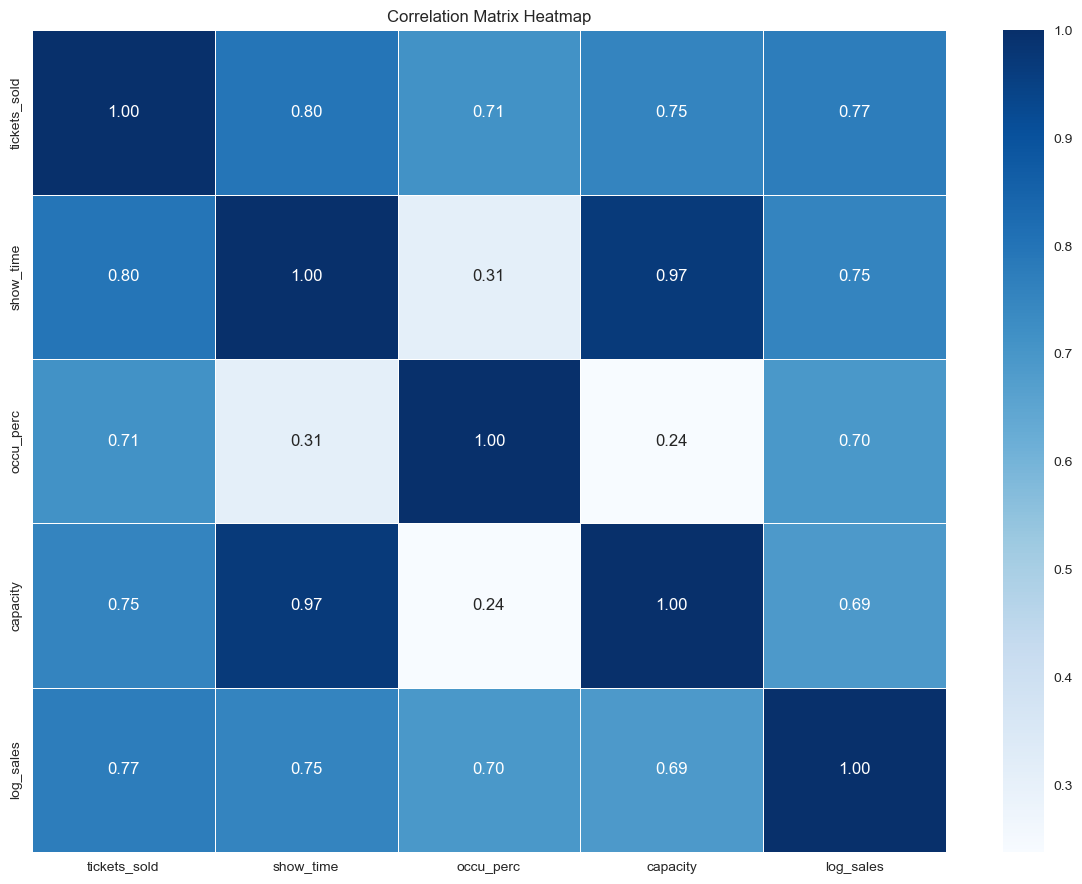

In [42]:
data_corr = df_no_outliers.drop(columns=['film_code', 'cinema_code', 'tickets_out', 'ticket_price', 'ticket_use', 'date', 'month', 'quarter', 'day', 'total_sales'])

# correlation matrix 
corr_matrix = data_corr.corr()

# Visualize using heatmap
plt.figure(figsize=(12,9)) 
plt.title('Correlation Matrix Heatmap')
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5) 
plt.tight_layout() 
plt.show() 

In [43]:
X = data_corr.drop(columns=['log_sales'])
y = data_corr['log_sales'] 

In [44]:
# standard scaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# split dataset 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Linear Regression 

In [47]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

# prediction 
y_pred = linear_model.predict(X_test) 

# evaluation 
mse = mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

# result
print("Linear Regression Coefficients:", linear_model.coef_)
print("Mean Squared Error:", mse)
print("Mean Absoloute Error:", mae)
print('R square', r2) 

Linear Regression Coefficients: [-0.65642745  1.20553437  0.99640513 -0.01902009]
Mean Squared Error: 0.2622554039801237
Mean Absoloute Error: 0.3610600650931728
R square 0.8306700505102272


### Ridge Regression 

In [49]:
# Set up GridSearchCV 
ridge_params = {'alpha': [0.01, 0.1, 0.5, 1, 10]}

# Initialize the ridge model
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5)

# Fit the model
ridge_cv.fit(X_train, y_train) 

# Best parameter 
print('Best parameter:', ridge_cv.best_params_)

# Best model 
best_ridge_model = ridge_cv.best_estimator_

# prediction 
y_pred2 = best_ridge_model.predict(X_test)

# evaluation 
mse = mean_squared_error(y_test, y_pred2) 
mae = mean_absolute_error(y_test, y_pred2) 
r2 = r2_score(y_test, y_pred2) 

# result
print("Linear Regression Coefficients:", best_ridge_model.coef_)
print("Mean Squared Error:", mse)
print("Mean Absoloute Error:", mae)
print('R square', r2) 

Best parameter: {'alpha': 1}
Linear Regression Coefficients: [-0.64730124  1.18896776  0.99192181 -0.00872312]
Mean Squared Error: 0.2620099097582901
Mean Absoloute Error: 0.36093635169570704
R square 0.8308285582990173


### Lasso Regression 

In [51]:
# Initialize the ridge model
lasso_cv = GridSearchCV(Lasso(), ridge_params, cv=5)

# Fit the model
lasso_cv.fit(X_train, y_train) 

# Best parameter 
print('Best parameter:', lasso_cv.best_params_)

# Best model 
best_lasso_model = lasso_cv.best_estimator_

# prediction 
y_pred3 = best_lasso_model.predict(X_test)

# evaluation 
mse = mean_squared_error(y_test, y_pred3) 
mae = mean_absolute_error(y_test, y_pred3) 
r2 = r2_score(y_test, y_pred3) 

# result
print("Linear Regression Coefficients:", best_lasso_model.coef_)
print("Mean Squared Error:", mse)
print("Mean Absoloute Error:", mae)
print('R square', r2) 

Best parameter: {'alpha': 0.01}
Linear Regression Coefficients: [-0.48614091  1.07281087  0.90127103  0.        ]
Mean Squared Error: 0.2638988575713516
Mean Absoloute Error: 0.3634767534644519
R square 0.8296089249457279


In [52]:
# Extract Intercept and Coefficients
intercept = best_lasso_model.intercept_
coefficients = best_lasso_model.coef_

# Combine Feature Names and Coefficients
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
})
print("Intercept:", intercept)
print("\nFeature Coefficients:")
print(coef_table)

Intercept: 17.221911480863668

Feature Coefficients:
        Feature  Coefficient
0  tickets_sold    -0.486141
1     show_time     1.072811
2     occu_perc     0.901271
3      capacity     0.000000


#### Explanation
1. tickets_sold: Coefficient = -0.486
    - Interpretation:
    For each additional unit of tickets_sold, the target variable decreases by approximately 0.486, holding all other variables constant.
    This negative coefficient suggests that as more tickets are sold, the target value decreases, which might indicate saturation or
    diminishing returns.
---
2. show_time: Coefficient = 1.073
    - Interpretation:
    For each additional unit increase in show_time, the target variable increases by 1.073, holding all other variables constant.
    A positive coefficient indicates that higher values of show_time are associated with an increase in the target value.
---
3. occu_perc: Coefficient = 0.901
    - Interpretation:
    For each additional unit increase in occu_perc (occupancy percentage), the target variable increases by 0.901, holding all other
    variables constant. A positive coefficient suggests that higher occupancy percentages lead to an increase in the target variable.

In [53]:
# Make prediction & add predicted sales 
lr_y_predicted_sales = best_lasso_model.predict(X_scaled)

# add and convert predict sales (log) into actual predicted sales
df_no_outliers['log_predicted_sales_lr'] = lr_y_predicted_sales
df_no_outliers['predicted_sales_lr'] = np.exp(df_no_outliers['log_predicted_sales_lr'])

df_no_outliers.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,log_sales,log_predicted_sales_lr,predicted_sales_lr
25,1492,448,1350000,9,0,2,2.37,150000.0,9,379.746835,2018-05-04,5,2,4,14.115616,15.199498,3.990781e+06
39,1492,448,2700000,18,0,2,9.68,150000.0,18,185.950413,2018-05-03,5,2,3,14.808763,15.478979,5.277582e+06
51,1492,448,4350000,29,0,2,7.92,150000.0,29,366.161616,2018-05-02,5,2,2,15.285687,15.397220,4.863261e+06
74,1492,448,1200000,8,0,1,4.21,150000.0,8,190.023753,2018-05-06,5,2,6,13.997833,14.918337,3.012670e+06
362,1492,448,6400000,80,0,1,42.11,80000.0,80,189.978627,2018-06-12,6,2,12,15.671809,16.339512,1.247843e+07


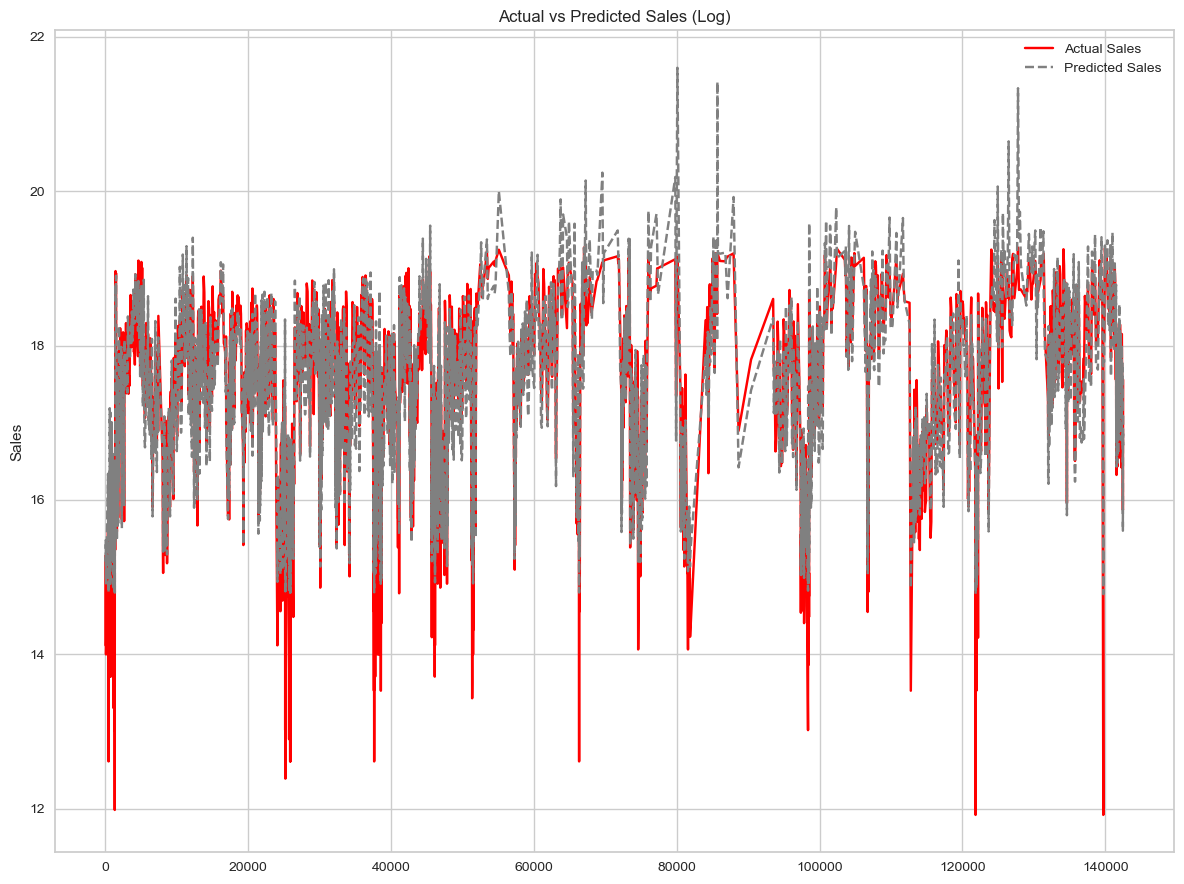

In [54]:
# compare actual vs predicted sales (log)
plt.figure(figsize=(12, 9))
plt.title('Actual vs Predicted Sales (Log)') 
plt.plot(df_no_outliers.index, df_no_outliers['log_sales'], label="Actual Sales", color="red")
plt.plot(df_no_outliers.index, df_no_outliers['log_predicted_sales_lr'], label="Predicted Sales", color="grey", linestyle="--")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout() 
plt.show() 

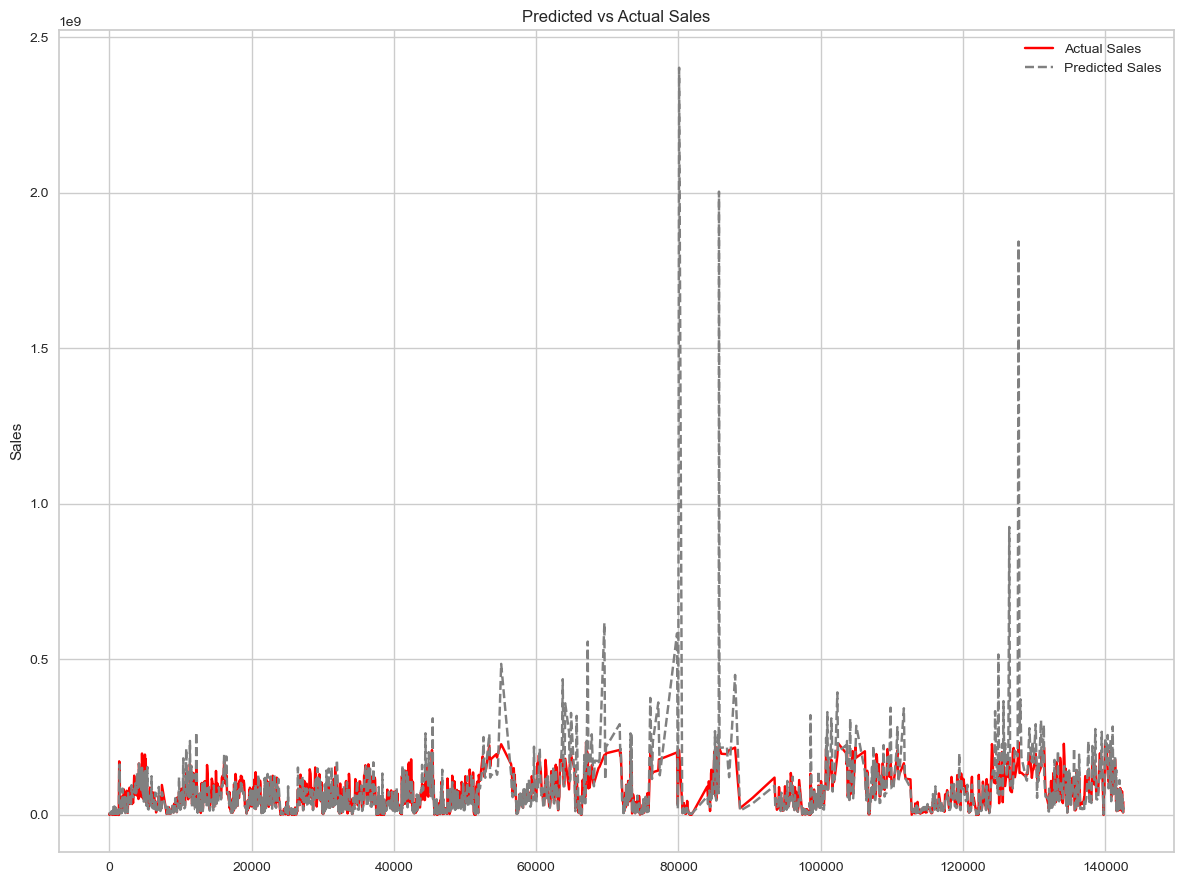

In [55]:
# compare actual vs predicted sales
plt.figure(figsize=(12, 9))
plt.title('Predicted vs Actual Sales') 
plt.plot(df_no_outliers.index, df_no_outliers['total_sales'], label="Actual Sales", color="red")
plt.plot(df_no_outliers.index, df_no_outliers['predicted_sales_lr'], label="Predicted Sales", color="grey", linestyle="--")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout() 
plt.show() 

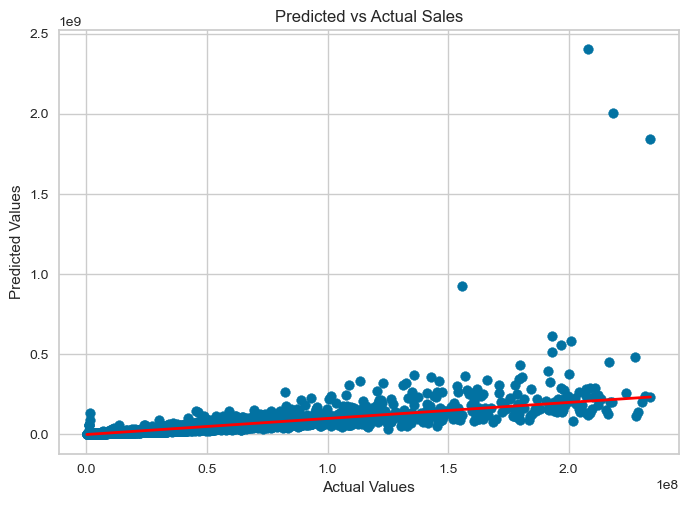

In [56]:
# compare actual vs predicted sales
plt.scatter(df_no_outliers['total_sales'], df_no_outliers['predicted_sales_lr'])
plt.plot([df_no_outliers['total_sales'].min(), df_no_outliers['total_sales'].max()], [df_no_outliers['total_sales'].min(), df_no_outliers['total_sales'].max()], color='red', lw=2)
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Decision Tree Regressor

In [58]:
df_no_outliers.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day', 'log_sales',
       'log_predicted_sales_lr', 'predicted_sales_lr'],
      dtype='object')

In [59]:
# Set feature & target 
X = df_no_outliers.drop(columns=['film_code', 'cinema_code', 'total_sales', 'tickets_out', 'ticket_use', 'date', 'month', 'quarter', 'day', 'log_sales', 'log_predicted_sales_lr', 'predicted_sales_lr'])
X_scaled2 = scaler.fit_transform(X)
y = df_no_outliers['log_sales']

In [60]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.3, random_state=42)

# Hyperparameter Grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Decision Tree with GridSearchCV
dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Model and Parameters
best_dt = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predictions on Test Set
y_test_pred = best_dt.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse:,.3f}")
print(f"Test MAE: {mae:,.3f}")
print(f"Test R^2: {r2:.4f}")

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test MSE: 0.003
Test MAE: 0.028
Test R^2: 0.9983


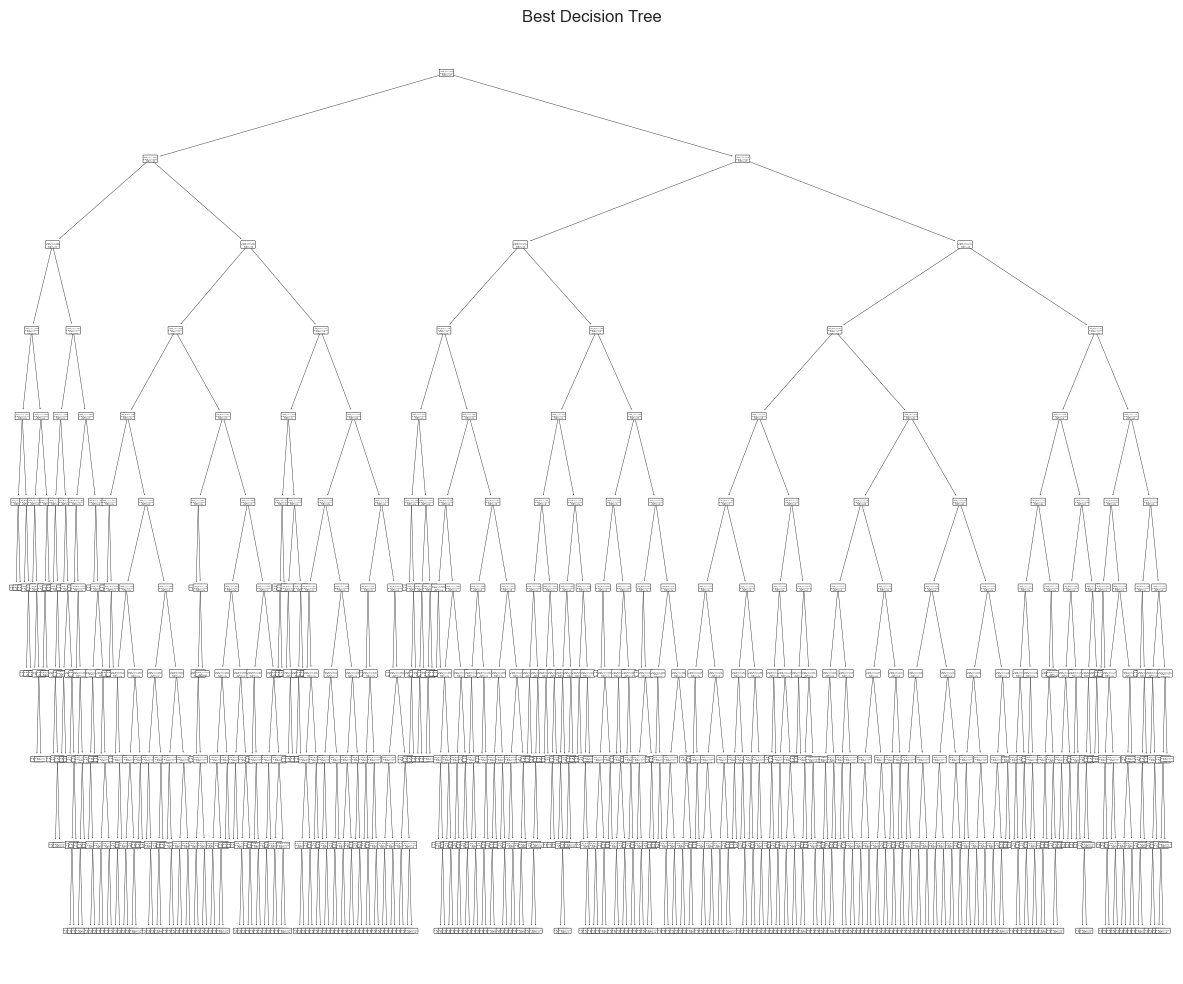

In [61]:
# Visualize the best dt model 
plt.figure(figsize=(12,10)) 
plot_tree(best_dt, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.title('Best Decision Tree')
plt.tight_layout()
plt.show()

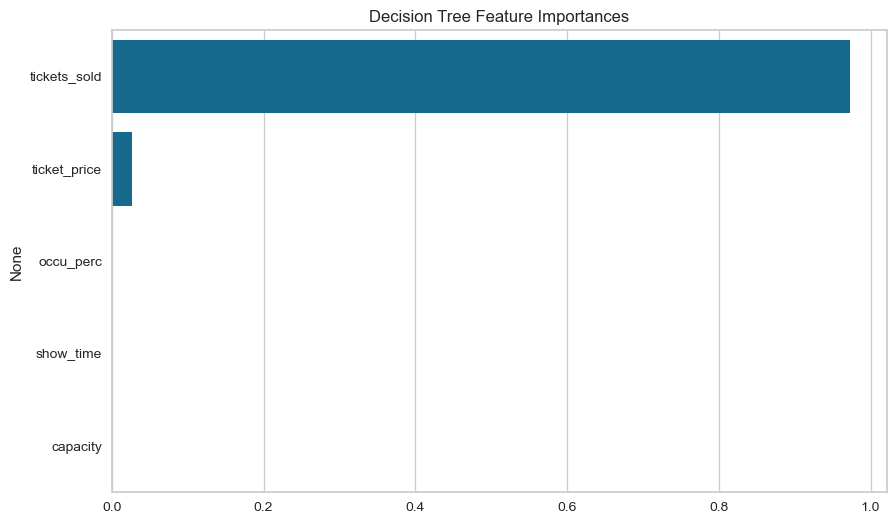

In [62]:
# Get feature importances from Random Forest Regressor
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Decision Tree Feature Importances')
plt.show()

In [63]:
# Make prediction & add predicted sales 
dt_y_predicted_sales = best_dt.predict(X_scaled2)

# add and convert predict sales (log) into actual predicted sales
df_no_outliers['log_predicted_sales_dt'] = dt_y_predicted_sales
df_no_outliers['predicted_sales_dt'] = np.exp(df_no_outliers['log_predicted_sales_dt'])

df_no_outliers.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,log_sales,log_predicted_sales_lr,predicted_sales_lr,log_predicted_sales_dt,predicted_sales_dt
25,1492,448,1350000,9,0,2,2.37,150000.0,9,379.746835,2018-05-04,5,2,4,14.115616,15.199498,3.990781e+06,14.115616,1.350001e+06
39,1492,448,2700000,18,0,2,9.68,150000.0,18,185.950413,2018-05-03,5,2,3,14.808763,15.478979,5.277582e+06,14.808763,2.700001e+06
51,1492,448,4350000,29,0,2,7.92,150000.0,29,366.161616,2018-05-02,5,2,2,15.285687,15.397220,4.863261e+06,15.262292,4.249417e+06
74,1492,448,1200000,8,0,1,4.21,150000.0,8,190.023753,2018-05-06,5,2,6,13.997833,14.918337,3.012670e+06,13.997833,1.200001e+06
362,1492,448,6400000,80,0,1,42.11,80000.0,80,189.978627,2018-06-12,6,2,12,15.671809,16.339512,1.247843e+07,15.653289,6.282568e+06


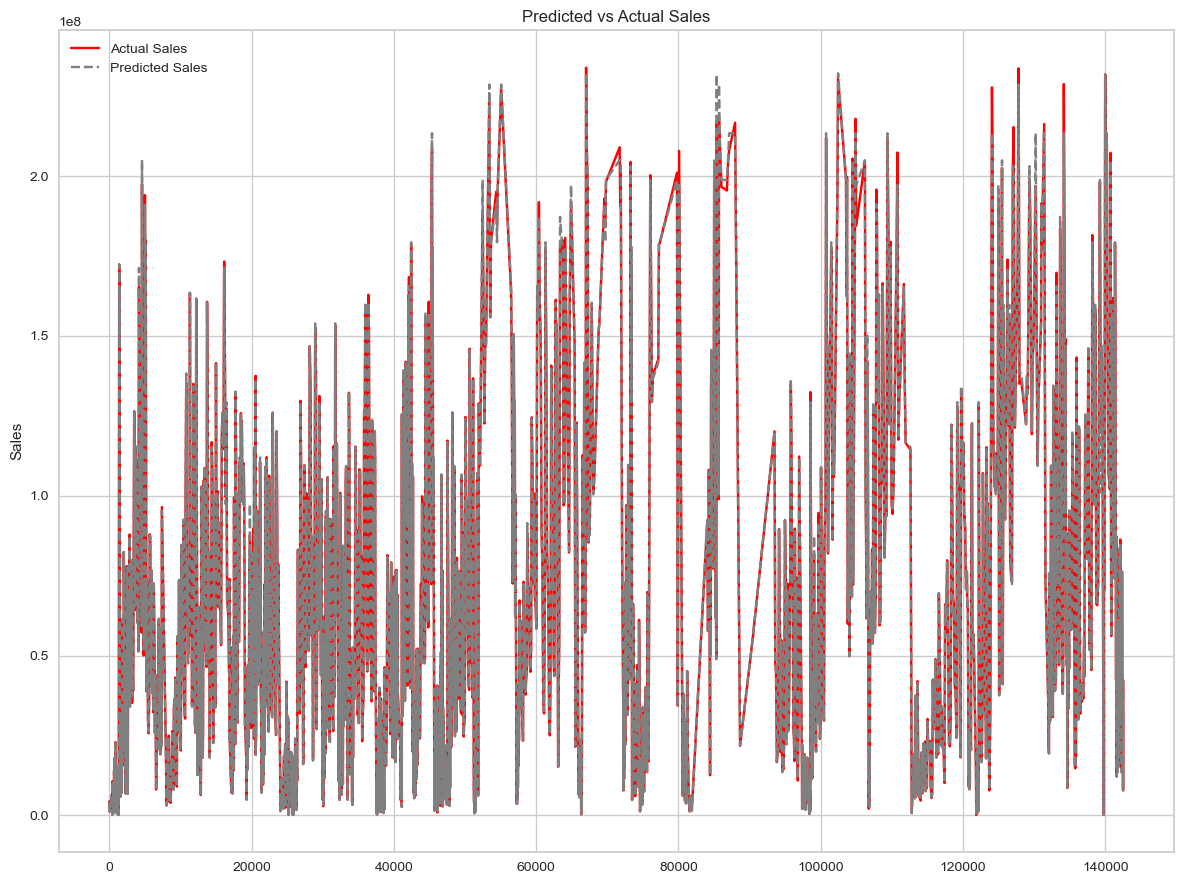

In [64]:
# compare actual vs predicted sales
plt.figure(figsize=(12, 9))
plt.title('Predicted vs Actual Sales') 
plt.plot(df_no_outliers.index, df_no_outliers['total_sales'], label="Actual Sales", color="red")
plt.plot(df_no_outliers.index, df_no_outliers['predicted_sales_dt'], label="Predicted Sales", color="grey", linestyle="--")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout() 
plt.show() 

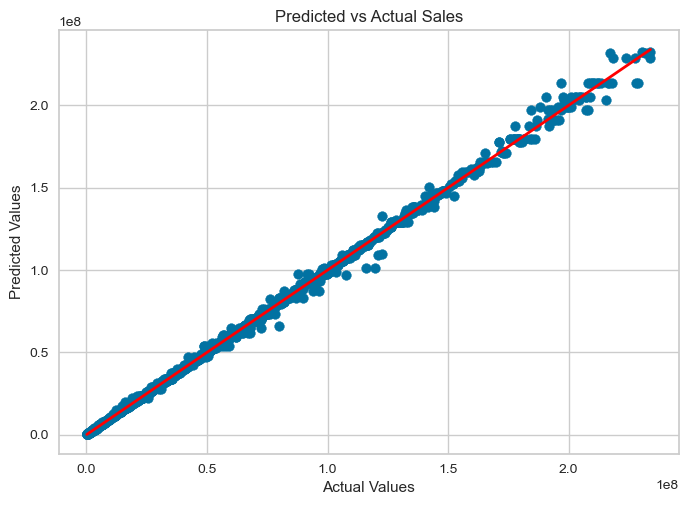

In [65]:
# compare actual vs predicted sales
plt.scatter(df_no_outliers['total_sales'], df_no_outliers['predicted_sales_dt'])
plt.plot([df_no_outliers['total_sales'].min(), df_no_outliers['total_sales'].max()], [df_no_outliers['total_sales'].min(), df_no_outliers['total_sales'].max()], color='red', lw=2)
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()